# Description

## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values
    *  0=No ( Customer did not leave the bank )
    * 1=Yes ( Customer left the bank )




### Data

In [2]:
!pip install scikeras

In [3]:
!pip install shap

In [4]:
# import required packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score as recall_score,
    f1_score,
    precision_recall_curve as precision_recall_curve,
    auc,
    classification_report,
    make_scorer as make_scorer,
    roc_auc_score as roc_auc_score,
    roc_curve as roc_curve
)
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.src.utils import to_categorical

from keras.optimizers import SGD

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
# To oversample data
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

from tensorflow.keras import backend

import shap


import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading dataset
data = pd.read_csv('/content/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# shape of the dataset
data.shape

(10000, 14)

In [7]:
# Check the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# checking the percentage of each class
data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [9]:
# check unique numbers for customerId and rowNumber
data['CustomerId'].nunique(), data['RowNumber'].nunique()


(10000, 10000)

In [10]:
# These are unique identifier for each data point and does not contain any insight hence dropping

data.drop(['CustomerId','RowNumber'], axis=1, inplace=True)

### EDA

## Univariant Analysis

In [ ]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

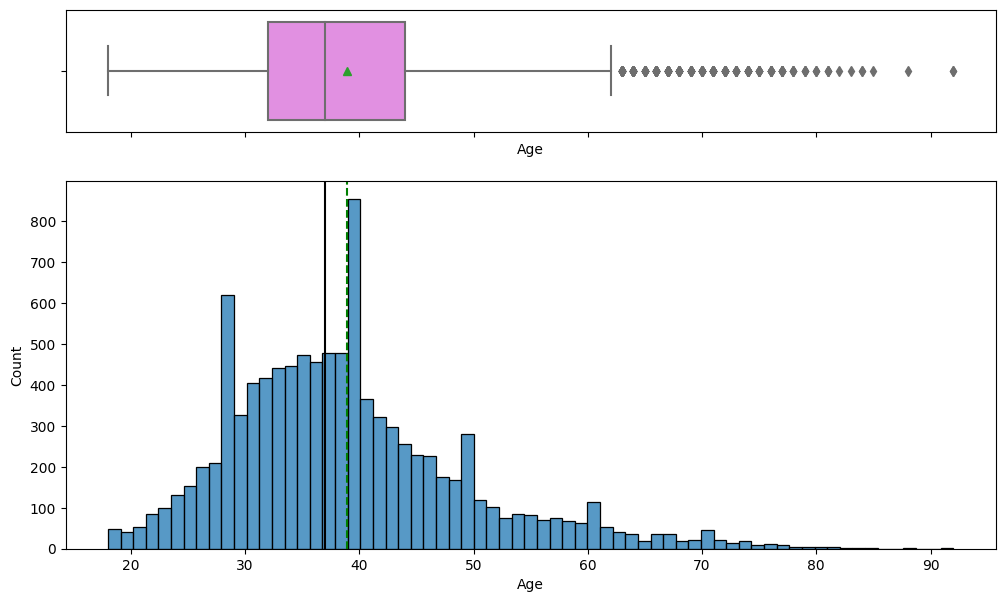

In [ ]:
histogram_boxplot(data, 'Age')

* Age is the normally distribute.
* Some customers older than 60 years.

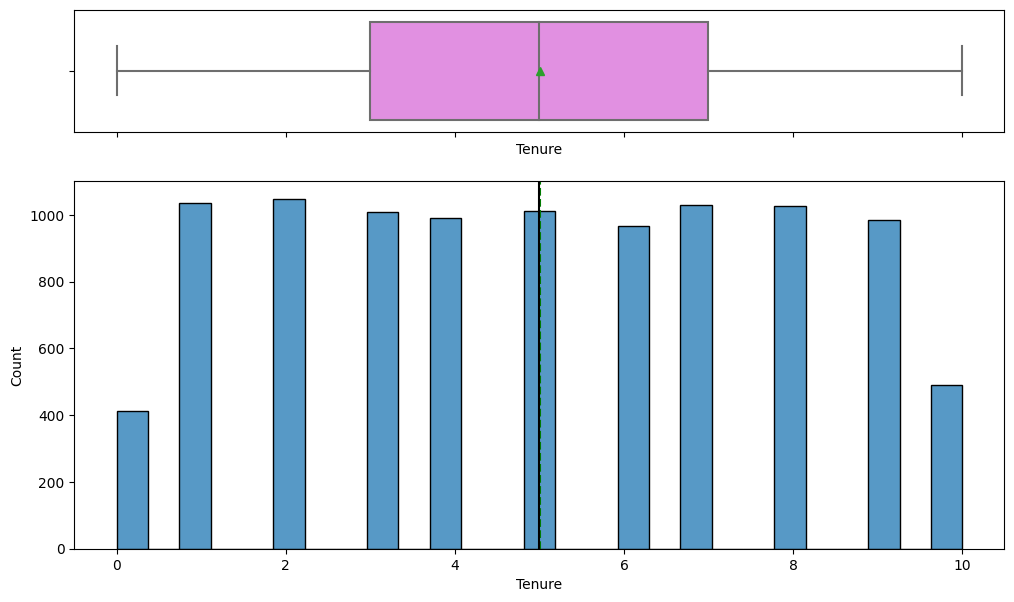

In [ ]:
histogram_boxplot(data,'Tenure')

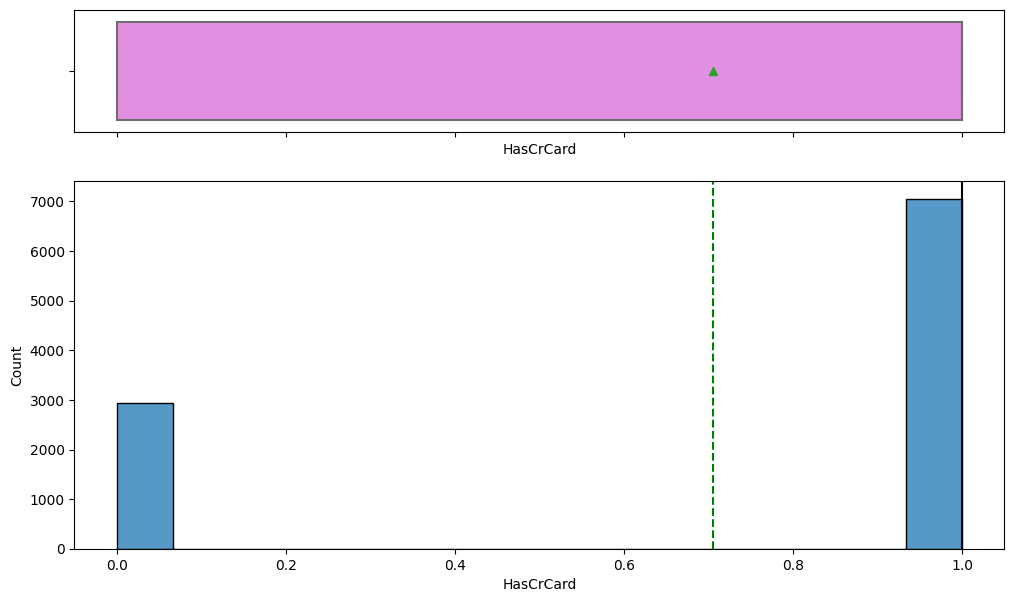

In [ ]:
histogram_boxplot(data,'HasCrCard')

* More than 6000 customers having credit card.
* ~ 3000 customers don't have credit card.

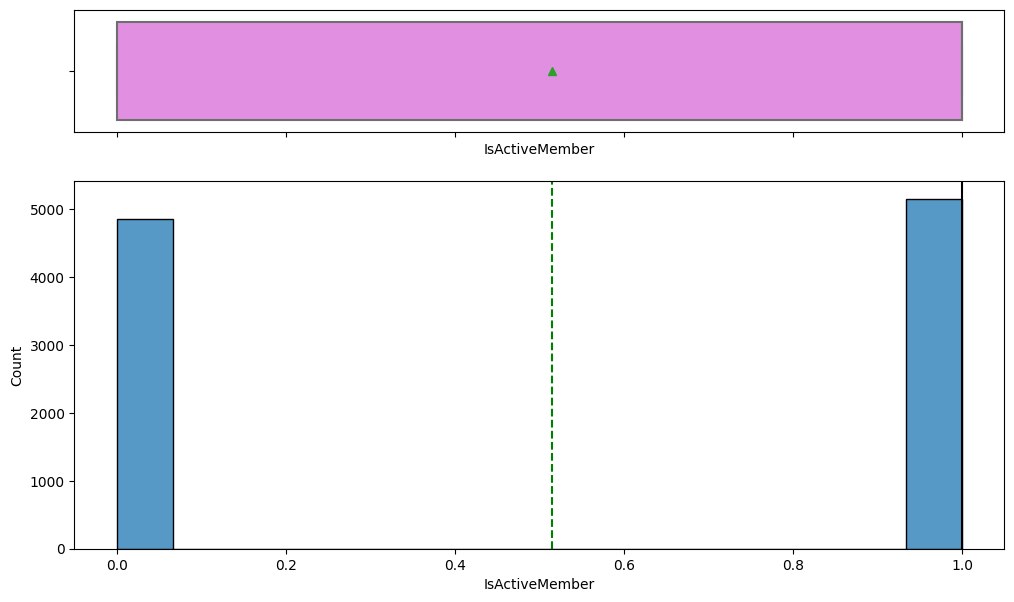

In [ ]:
histogram_boxplot(data, 'IsActiveMember')

* Almost 50 % of the customers are not active member of the bank.

In [ ]:
data['NumOfProducts'].value_counts(normalize=True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

## Bivariant Ananlysis

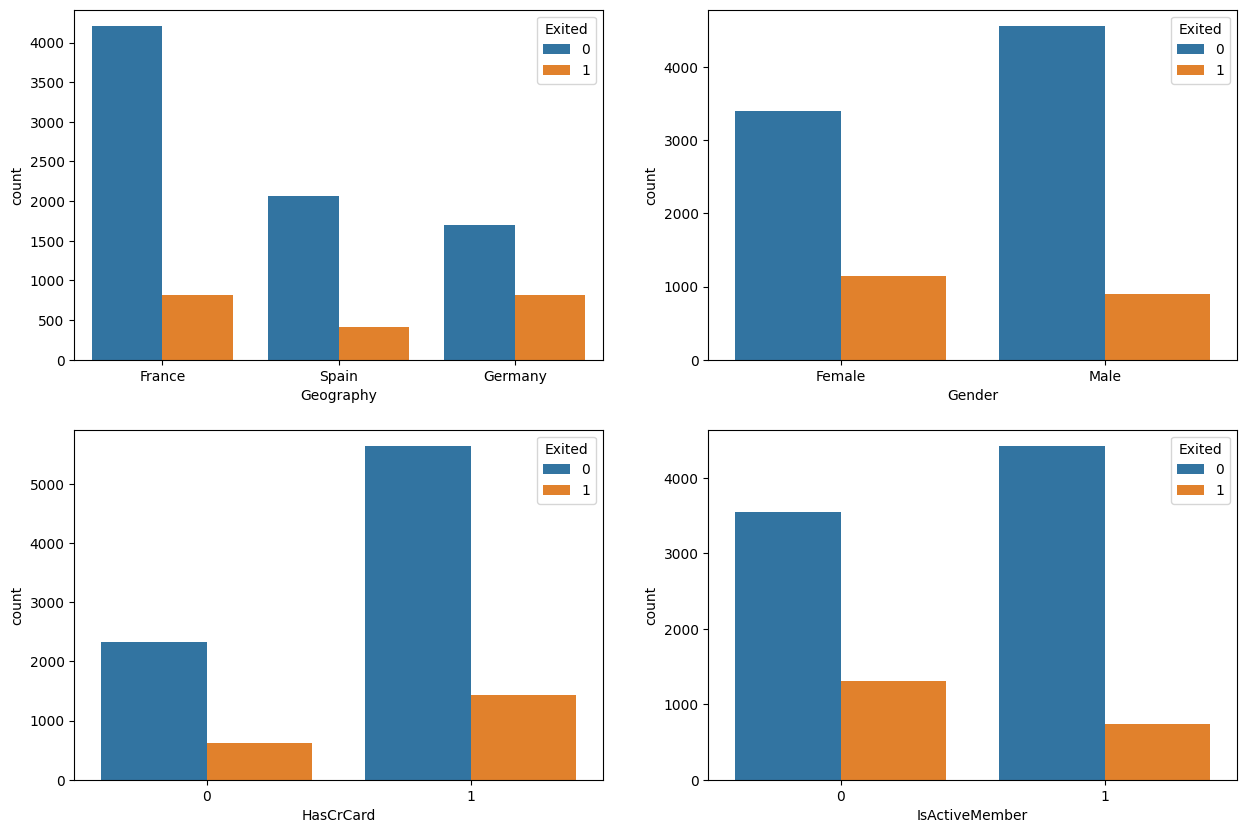

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axes[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axes[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axes[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axes[1][1])

plt.show()

* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
The proportion of female customers churning is also greater than that of male customers
* Majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
* Inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

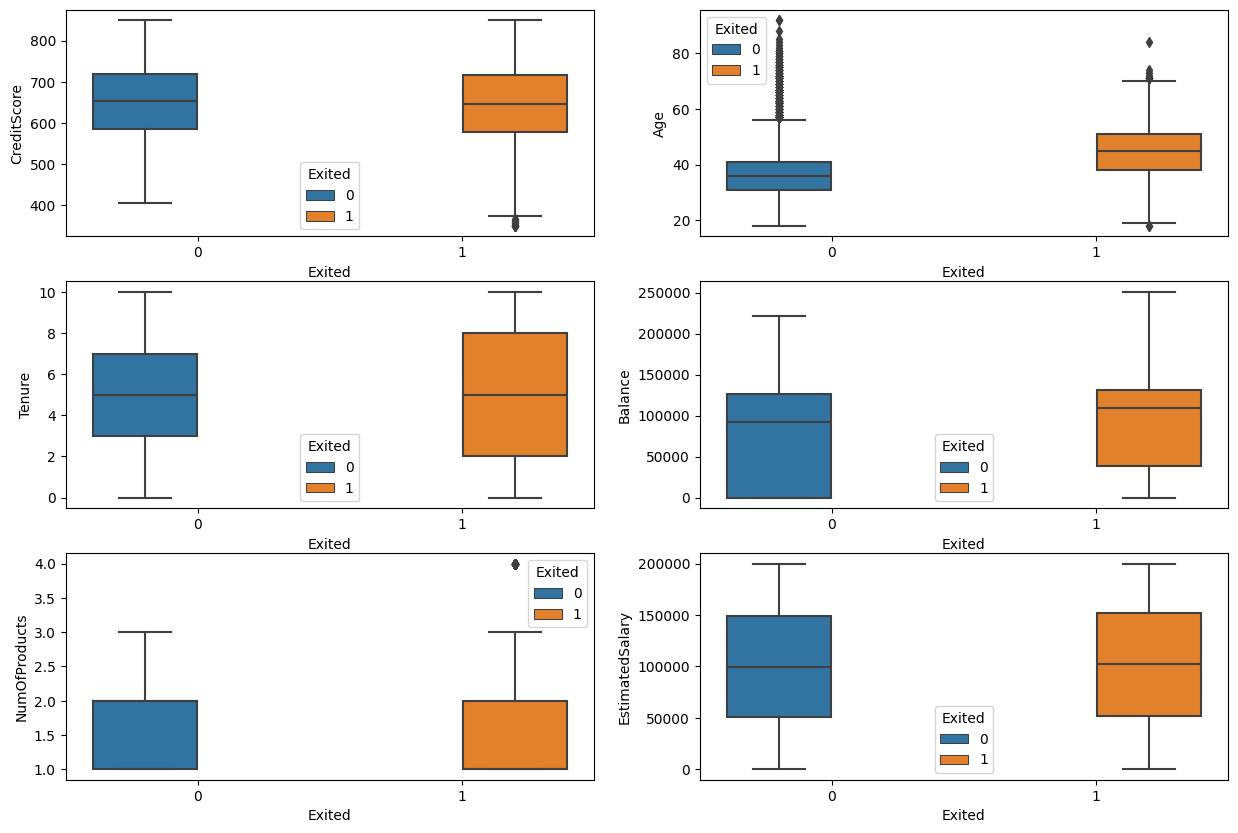

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(15, 10))

sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

plt.show()

* There are no significant impact on customer's churned based on CreditScore.
* Older customers are churning compare to younger , bank need to review this age group.
* Customers which are with the bank since long likely to churn. May be these customers are not happy with the offeres and other perks compare to other banks .
* Customers having high balance are likely to churn.
* Neither the product nor the salary has a significant effect on the likelihood to churn.  

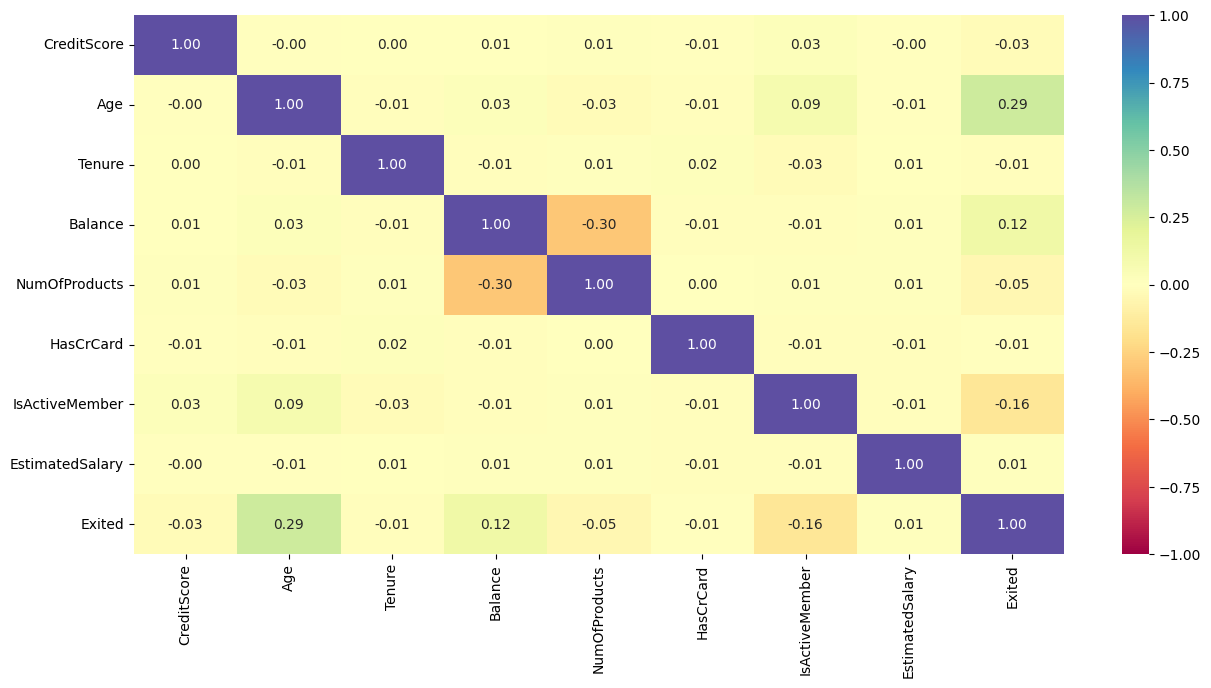

In [ ]:
# Correlation between numberic columns
plt.figure(figsize=(15, 7));
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Numeric features not showing strong correlation with traget variable.
* Age is showing the better correlation compare to other with target variable (29%).

## Data Preprocessing

In [11]:
# Get columns name for preprocessing and model
column_names = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
subset_df = data[column_names]

subset_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
# One hot encoding for categorical variables
subset_df = pd.get_dummies(data=subset_df, columns=['Geography','Gender'], drop_first=True)

In [13]:
subset_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
# Prepare the data for modeling
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(subset_df,y,test_size=.25, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7500, 11)
(2500, 11)
(7500,)
(2500,)


In [16]:
# We try to ensure that the numerical variables have a Gaussian distribution. For them we will apply a PowerTransformer.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

## Common Functions

In [18]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)
    return accuracy, precision,recall,f1_score

In [19]:
# AUC score for ANN
def get_auc_scores(model,features, targets):
  score = roc_auc_score(targets,np.round(model.predict(features)))
  fpr,tpr,thresholds = roc_curve(targets,model.predict(features))
  return score,fpr,tpr,thresholds

# AUC score for supervised learning algorthim
def get_auc_scores_super(model,features, target):
  score = roc_auc_score(target,model.predict(features))
  fpr,tpr,thresholds = roc_curve(target,model.predict_proba(features)[:,1])
  return score,fpr,tpr,thresholds


In [20]:
# Model evalution and confusion matrix
def evalute_model(model, features, targets, model_type='NN'):

  if(model_type=='NN'):

    model.evaluate(features,targets)
    predictions = np.round(model.predict(features))

  else:
    predictions = model.predict(features)


  cm3=confusion_matrix(targets, predictions)
  labels = ['True Negative','False Positive','False Negative','True Positive']
  cm_data = make_confusion_matrix(cm3,
                        group_names=labels,
                        #categories=categories,
                        cmap='Blues')
  df = pd.DataFrame({
      'Accuracy': cm_data[0],
      'Precision': cm_data[1],
      'Recall': cm_data[2],
      'F1-Score': cm_data[3]
  },
   index=[0],
  )
  return df

In [21]:
def plot_accuracy(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('Accuracy vs Epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


In [22]:
def clear_session():
  # Clearing the backend
  backend.clear_session()

## Model evaluation criterion

The model can make wrong predictions as:

Model predict that customer will leave the bank but actual customer would not leave the bank - Loss of resource

Model predict that customer will not leave the bank but actually customer will leave the bank - Loss of money

**Which case is more important?**

Problem statement is about to find out the customers ,going to leave the bank hence model should not predict the customers those are definetly not leaving the bank.
Which metric to optimize?

Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

## Build a model with Adam optimizer

In [ ]:
def ann():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(tf.keras.layers.Dense(128, activation='relu'))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
# Compile and fit the model
model_ann = ann()

optimizer = tf.keras.optimizers.Adam()

model_ann.compile(optimizer=optimizer, loss=['binary_crossentropy'], metrics=['accuracy'])
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit the ANN model
history_ann = model_ann.fit(X_train, y_train, validation_split=.1, epochs=100, verbose=0)

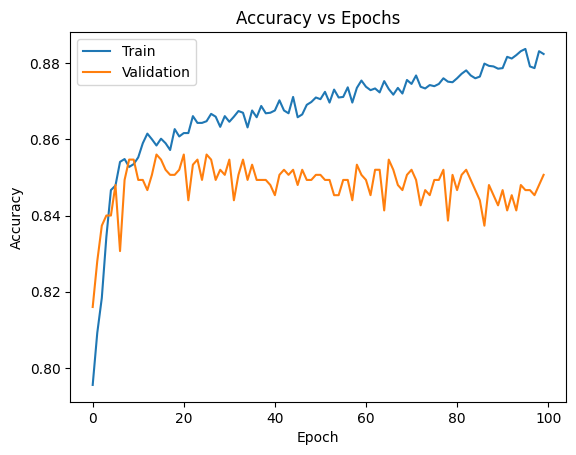

In [ ]:
# plot the accuracy vs epoch for training and validation
plot_accuracy(history_ann)

* Training accuracy is increasing but validation accuracy is fluctiating with decresing trend.
* Accuracy of the model on the training data set is about 88 % and validation data set is about to 85 % .
* Model is overfiting with the training data.  
* Let's add the dropout layer to avoid overfitting.

235/235 [==============================] - 1s 2ms/step


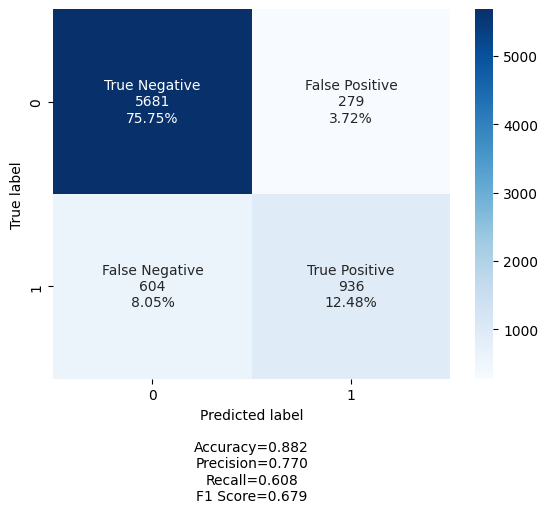

In [ ]:
df_ann_train = evalute_model(model_ann, X_train, y_train)

79/79 [==============================] - 0s 1ms/step


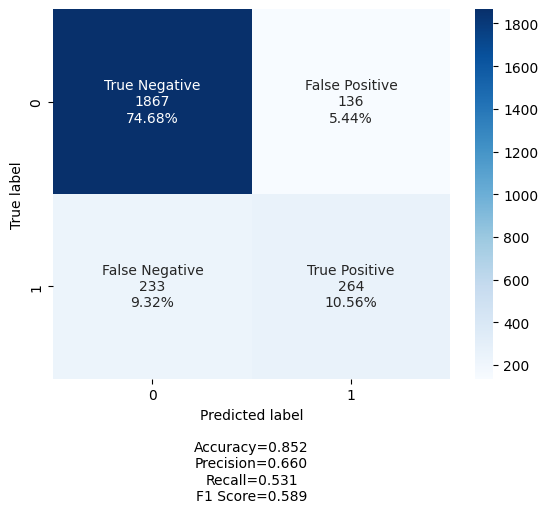

In [ ]:
df_ann_test =evalute_model(model_ann, X_test, y_test)

## Build a model with Dropout and Adam optimizer

In [23]:
# Add the dropout layer to drop 20% random hidden neurons
# define the model

def ann_with_dropout():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))


  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(.2))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
# create the model object
model_ann_with_dropout = ann_with_dropout()

# decalare the Adam optimizer
optimizer = tf.keras.optimizers.Adam()

# compile the model
model_ann_with_dropout.compile(optimizer=optimizer, loss=['binary_crossentropy'], metrics=['accuracy'])

model_ann_with_dropout.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                768       
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit the ANN with Dropout model
history_model_ann_with_dropout = model_ann_with_dropout.fit(X_train, y_train, validation_split=.1, epochs=100, verbose=0)


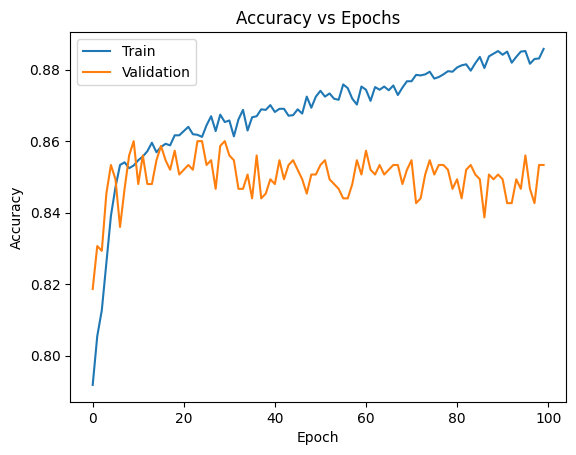

In [ ]:
# plot the accuracy vs epoch for training and validation
plot_accuracy(history_model_ann_with_dropout)


235/235 [==============================] - 1s 2ms/step


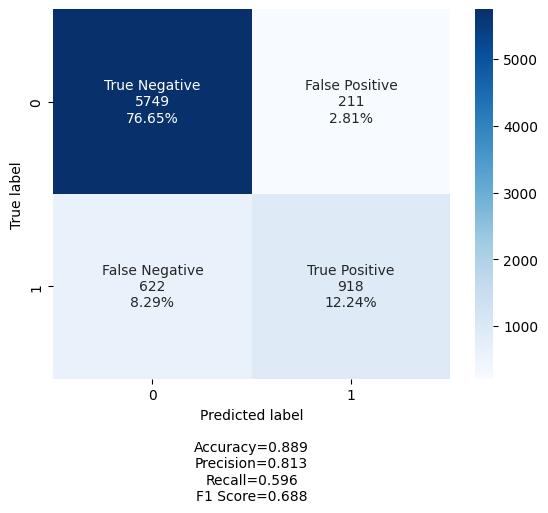

In [ ]:
# perforamce metrix on training data
df_ann_with_dropout_train = evalute_model(model_ann_with_dropout, X_train, y_train)

79/79 [==============================] - 0s 1ms/step


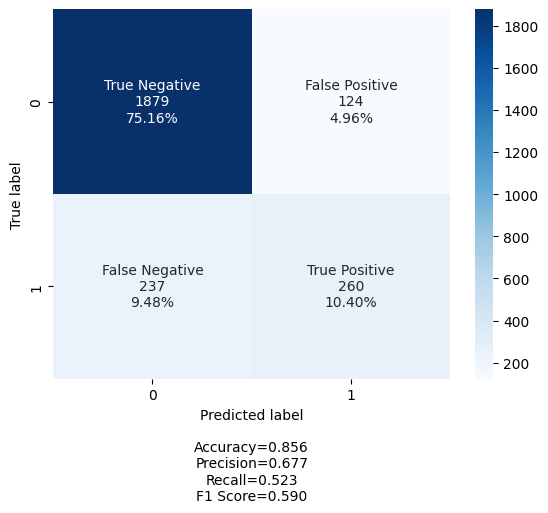

In [ ]:
# performance metrix on test data
df_ann_with_dropout_test = evalute_model(model_ann_with_dropout, X_test, y_test)

* Adding dropout, model still suffers with overfit.
* Model accuracy is about to 88% on training data set and about 85 % on validation data set which is slightly lower that without dropout layers.
* Let try to add hidden layer and dropout to see the performance.

In [ ]:
def ann_with_hidden_and_dropout():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(.2))


  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(.2))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
model_ann_with_hidden_and_dropout = ann_with_hidden_and_dropout()

# decalare the Adam optimizer
optimizer = tf.keras.optimizers.Adam()

# compile the model
model_ann_with_hidden_and_dropout.compile(optimizer=optimizer, loss=['binary_crossentropy'], metrics=['accuracy'])

model_ann_with_hidden_and_dropout.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 64)                768       
                                                                 
 dense_81 (Dense)            (None, 128)               8320      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_82 (Dense)            (None, 256)               33024     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_83 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42369 (165.50 KB)
Trainable params: 423

In [ ]:
# fit the  ANN/Hidden Layer with Dropout model
history_model_ann_with_hidden_and_dropout = model_ann_with_hidden_and_dropout.fit(X_train, y_train, validation_split=.1, epochs=100, verbose=0)

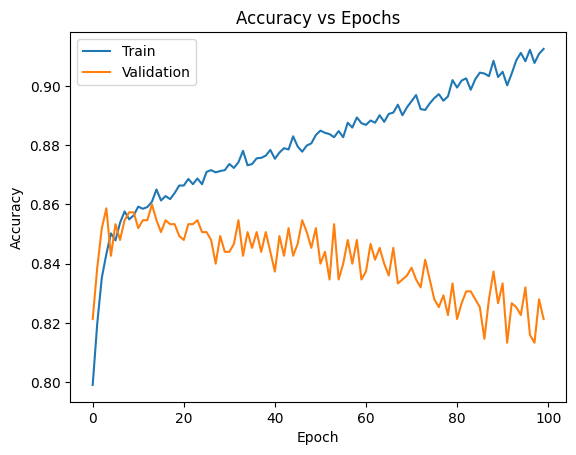

In [ ]:
# plot the accuracy vs epoch for training and validation
plot_accuracy(history_model_ann_with_hidden_and_dropout)

* After adding hidden layer , model not showing improvement to overcome the overfitting and overfitting increased.


235/235 [==============================] - 0s 2ms/step


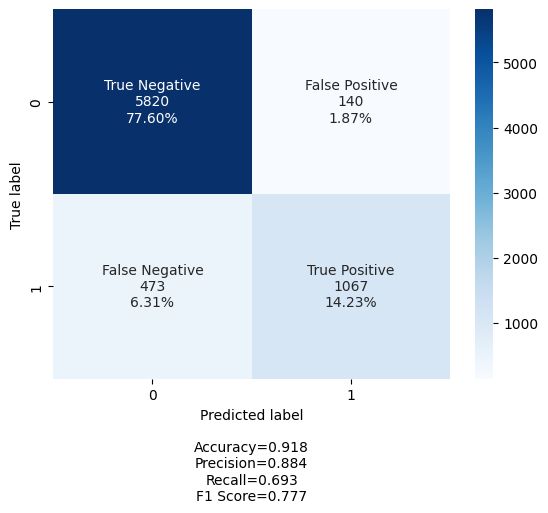

In [ ]:
# evalute the model on training data set
df_ann_with_hidden_and_dropout_training = evalute_model(model_ann_with_hidden_and_dropout, X_train,y_train)

79/79 [==============================] - 0s 2ms/step


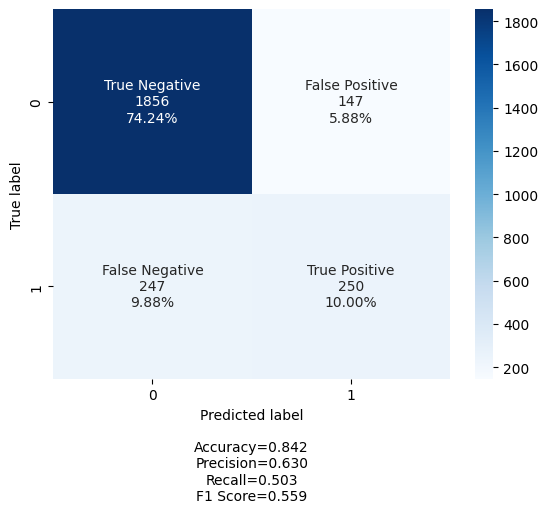

In [ ]:
# evalute the model on training data set
df_ann_with_hidden_and_dropout_test = evalute_model(model_ann_with_hidden_and_dropout, X_test,y_test)

## Build model with Hyperparameter tuning using Grid search and Adam optimizer

* Tune Batch Size and Number of Epochs

In [ ]:
def ann_batch_size_and_number_of_epoch():

  # create sequential model
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(tf.keras.layers.Dense(128, activation='relu'))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(), loss=['binary_crossentropy'], metrics=['accuracy'])
  return model

In [ ]:
model_ann_batch_size_and_number_of_epoch = KerasClassifier(model=ann_batch_size_and_number_of_epoch, random_state=42, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model_ann_batch_size_and_number_of_epoch, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852800 using {'batch_size': 10, 'epochs': 10}
0.852800 (0.001178) with: {'batch_size': 10, 'epochs': 10}
0.840933 (0.003271) with: {'batch_size': 10, 'epochs': 50}
0.834800 (0.008770) with: {'batch_size': 10, 'epochs': 100}
0.850933 (0.000943) with: {'batch_size': 20, 'epochs': 10}
0.839467 (0.007195) with: {'batch_size': 20, 'epochs': 50}
0.845600 (0.003919) with: {'batch_size': 20, 'epochs': 100}
0.847467 (0.000499) with: {'batch_size': 40, 'epochs': 10}
0.846533 (0.005936) with: {'batch_size': 40, 'epochs': 50}
0.850933 (0.001543) with: {'batch_size': 40, 'epochs': 100}
0.844267 (0.001799) with: {'batch_size': 60, 'epochs': 10}
0.845600 (0.005133) with: {'batch_size': 60, 'epochs': 50}
0.849600 (0.000980) with: {'batch_size': 60, 'epochs': 100}
0.839467 (0.003642) with: {'batch_size': 80, 'epochs': 10}
0.846000 (0.002903) with: {'batch_size': 80, 'epochs': 50}
0.851600 (0.001697) with: {'batch_size': 80, 'epochs': 100}
0.836267 (0.006182) with: {'batch_size': 100, 'epochs': 

In [ ]:
print('Training score : %f' % (grid_result.score(X_train,y_train)))
print('Testing score : %f' % (grid_result.score(X_test,y_test)))

Training score : 0.862800
Testing score : 0.860000


* Training and Test scores are 86%
* Let check the confusion metrix on train and test data .

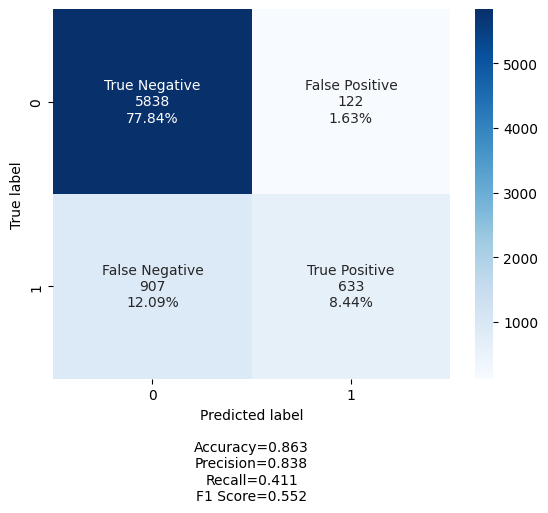

In [ ]:
# evaluate the model on training
df_ann_batch_size_and_number_of_epoch_train = evalute_model(grid_result,X_train,y_train, 'GridSearchCV')

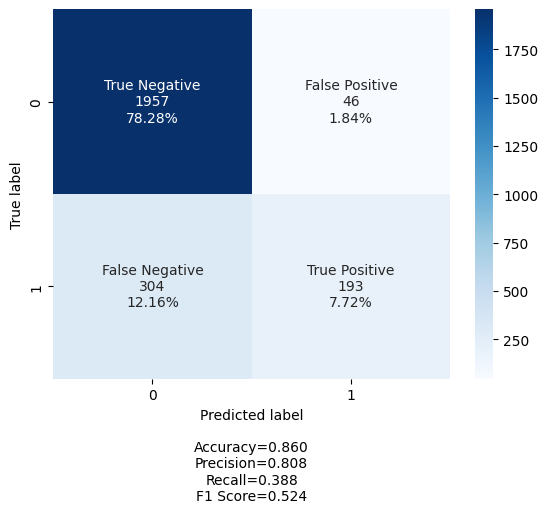

In [ ]:
# evaluate the model on test
df_ann_batch_size_and_number_of_epoch_test = evalute_model(grid_result,X_test,y_test, 'GridSearchCV')

* Tune the Training Optimization Algorithm

In [ ]:
def ann_optimizer_algorithm(optimizer = 'adam'):

  # create sequential model
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(tf.keras.layers.Dense(128, activation='relu'))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # compile the model
  model.compile(optimizer=optimizer, loss=['binary_crossentropy'], metrics=['accuracy'])
  return model

In [ ]:
model_ann_optimizer_algorithm = KerasClassifier(model = ann_optimizer_algorithm,random_state=42,verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
param_grid = dict(model__optimizer= optimizer)

grid = GridSearchCV(estimator=model_ann_optimizer_algorithm, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')

grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800000 using {'model__optimizer': 'RMSprop'}
0.794667 (0.000189) with: {'model__optimizer': 'SGD'}
0.800000 (0.003960) with: {'model__optimizer': 'RMSprop'}
0.794667 (0.000189) with: {'model__optimizer': 'Adagrad'}
0.799733 (0.004815) with: {'model__optimizer': 'Adam'}


* RMSprop giving the best mean score .
* Adam optimizer is giving the slightly lower than RMSprop.
* Let's focus on Adam optimizer and check with different learning rate.

In [ ]:
#grid_result = grid_result.best_estimator_
print('Training score (with optimizer) : %f' % (grid_result.score(X_train,y_train)))
print('Testing score (with optimizer) : %f' % (grid_result.score(X_test,y_test)))

Training score (with optimizer) : 0.800533
Testing score (with optimizer) : 0.810000


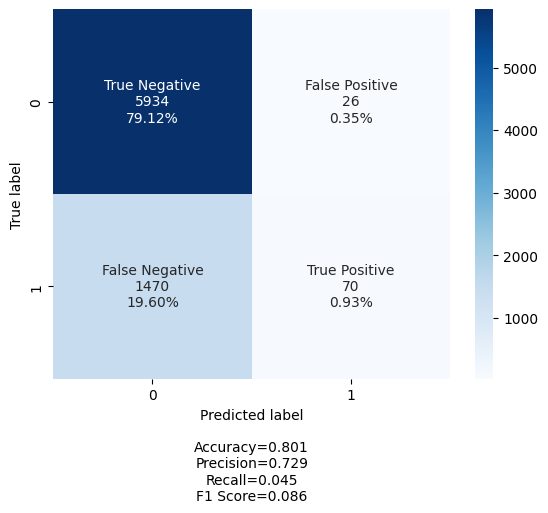

In [ ]:
# evaluate the model on training
df_ann_optimizer_algorithm_train = evalute_model(grid_result,X_train,y_train, 'GridSearchCV')

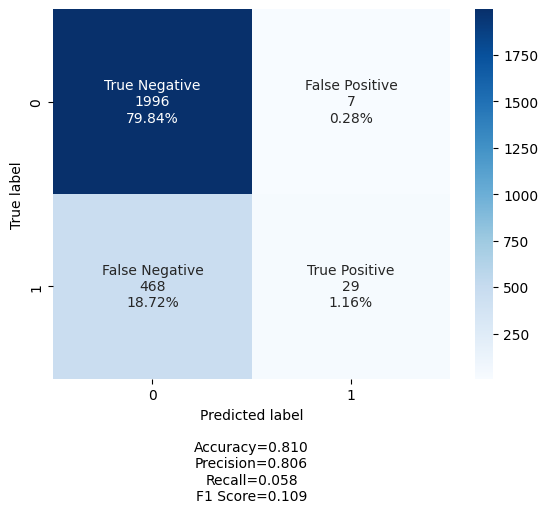

In [ ]:
# evaluate the model on test
df_ann_optimizer_algorithm_test = evalute_model(grid_result,X_test,y_test, 'GridSearchCV')

* Tune the Training Optimization Algorithm with learning rate

In [ ]:
def ann_optimizer_algorithm_with_learning_rate():

  # create sequential model
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(tf.keras.layers.Dense(128, activation='relu'))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(), loss=['binary_crossentropy'], metrics=['accuracy'])
  return model

In [ ]:
# create model
model_ann_optimizer_algorithm_with_learning_rate = KerasClassifier(
    model=ann_optimizer_algorithm_with_learning_rate,
    loss="binary_crossentropy",optimizer="Adam", verbose=0)

# define the grid search parameters
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(optimizer__learning_rate=learning_rate)

grid = GridSearchCV(estimator=model_ann_optimizer_algorithm_with_learning_rate, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800933 using {'optimizer__learning_rate': 0.1}
0.800133 (0.002640) with: {'optimizer__learning_rate': 0.001}
0.800533 (0.001914) with: {'optimizer__learning_rate': 0.01}
0.800933 (0.001969) with: {'optimizer__learning_rate': 0.1}
0.800267 (0.000943) with: {'optimizer__learning_rate': 0.2}
0.799467 (0.003172) with: {'optimizer__learning_rate': 0.3}


* Best score at learning rate : 0.1

In [ ]:
#grid_result = grid_result.best_estimator_
print('Training score (with learning rate) : %f' % (grid_result.score(X_train,y_train)))
print('Testing score (with learning rate) : %f' % (grid_result.score(X_test,y_test)))

Training score (with learning rate) : 0.801333
Testing score (with learning rate) : 0.813600


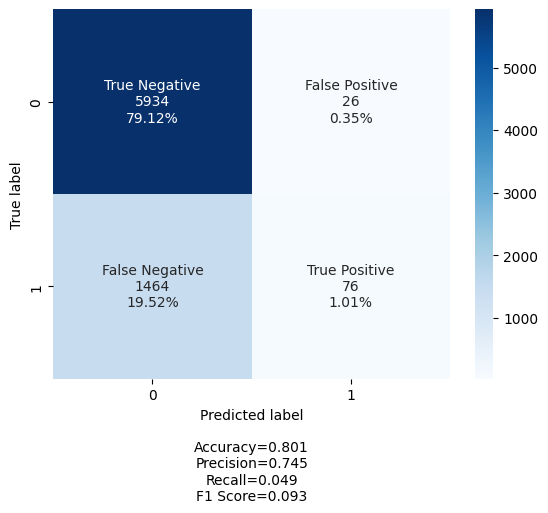

In [ ]:
# evaluate the model on training
df_ann_optimizer_algorithm_with_learning_rate_train = evalute_model(grid_result,X_train,y_train, 'GridSearchCV')

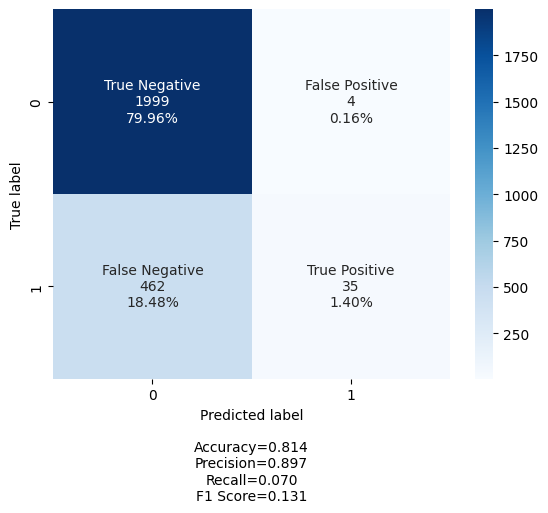

In [ ]:
# evaluate the model on test
df_ann_optimizer_algorithm_with_learning_rate_test = evalute_model(grid_result,X_test,y_test, 'GridSearchCV')

* Tune the Training Optimization Algorithm with weight initialization

In [ ]:
def ann_optimizer_algorithm_with_weight_initialization(init_mode='uniform'):

  # create sequential model
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(64, activation='relu',kernel_initializer=init_mode, input_shape=(X_train.shape[1],)))
  model.add(tf.keras.layers.Dense(128,kernel_initializer=init_mode, activation='relu'))

  model.add(tf.keras.layers.Dense(1, kernel_initializer=init_mode,activation='sigmoid'))

  # compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(), loss=['binary_crossentropy'], metrics=['accuracy'])
  return model

In [ ]:
# create model
model_ann_optimizer_algorithm_with_weight_initialization = KerasClassifier(model=ann_optimizer_algorithm_with_weight_initialization, verbose=0)

# define the grid search parameters
init_mode = ['uniform','normal', 'he_normal', 'he_uniform']

param_grid = dict(model__init_mode=init_mode)

grid = GridSearchCV(estimator=model_ann_optimizer_algorithm_with_weight_initialization, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')

grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.801600 using {'model__init_mode': 'he_uniform'}
0.794667 (0.000189) with: {'model__init_mode': 'uniform'}
0.794667 (0.000189) with: {'model__init_mode': 'normal'}
0.799867 (0.002963) with: {'model__init_mode': 'he_normal'}
0.801600 (0.000864) with: {'model__init_mode': 'he_uniform'}


In [ ]:
print('Training score (with weight_initialization) : %f' % (grid_result.score(X_train,y_train)))
print('Testing score (with weight_initialization) : %f' % (grid_result.score(X_test,y_test)))

Training score (with weight_initialization) : 0.799467
Testing score (with weight_initialization) : 0.806400


* Tune the Training Optimization Algorithm with activation

In [ ]:
def ann_optimizer_algorithm_with_activation(activation='relu'):

  # create sequential model
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(64, activation='relu',kernel_initializer='uniform', input_shape=(X_train.shape[1],)))
  model.add(tf.keras.layers.Dense(128,kernel_initializer='uniform', activation='relu'))

  model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform',activation='sigmoid'))

  # compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(), loss=['binary_crossentropy'], metrics=['accuracy'])
  return model

In [ ]:
# create model
model_ann_optimizer_algorithm_with_activation = KerasClassifier(model=ann_optimizer_algorithm_with_activation, verbose=0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid',]
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model_ann_optimizer_algorithm_with_activation, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')

grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.794667 using {'model__activation': 'softmax'}
0.794667 (0.000189) with: {'model__activation': 'softmax'}
0.794667 (0.000189) with: {'model__activation': 'relu'}
0.794667 (0.000189) with: {'model__activation': 'tanh'}
0.794667 (0.000189) with: {'model__activation': 'sigmoid'}


In [ ]:
print('Training score (with weight_activation) : %f' % (grid_result.score(X_train,y_train)))
print('Testing score (with weight_activation) : %f' % (grid_result.score(X_test,y_test)))

Training score (with weight_activation) : 0.794667
Testing score (with weight_activation) : 0.801200


* We have tried different hyper parameters tuning like dropout, learning rates, weight initialization , below scores are found :   

  1. Batch Size and Number of Epochs : 0.855067 using {'batch_size': 10, 'epochs': 10}
  2. Optimization Algorithm : 0.855200 using {'model__optimizer': 'RMSprop'}
  3. Learning rate: 0.856400 using {'optimizer__learning_rate': 0.1}
  4. Weight initialization: 0.801600 using {'model__init_mode': 'he_uniform'}
  5. Activation: 0.0.794667 using {'model__activation': 'softmax'}


* Maximum score rached about to 85 % which seems like model reached the local minima when using GridSearchCV .
* Learning rate is one of the most important hypertuning parameters which needs to be tune first.
* Basic ANN with one dropout layer showing the better accuracy on traing and validation data set and less overfit compare to basic ANN, consider this (ANN + Dropout) as base model and try to do tuning on learning rate
* Lets try different learning rate with large epochs.

In [ ]:
# Lets try with different learing rate using Keras API
def fit_model(trainX,trainy,testX,testy, lrate):
  model = ann_with_dropout()
  optimizer = tf.keras.optimizers.Adam(learning_rate=lrate)
  model.compile(optimizer=optimizer, loss=['binary_crossentropy'], metrics=['accuracy'])

  # fit model
  history = model.fit(trainX,trainy, validation_split=.1,epochs=100, verbose=0 )

  # plot learning curves
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('lrate='+str(lrate), pad=-50)
  #plt.legend(['Train', 'Validation'], loc='lower right')

  plt.tight_layout()


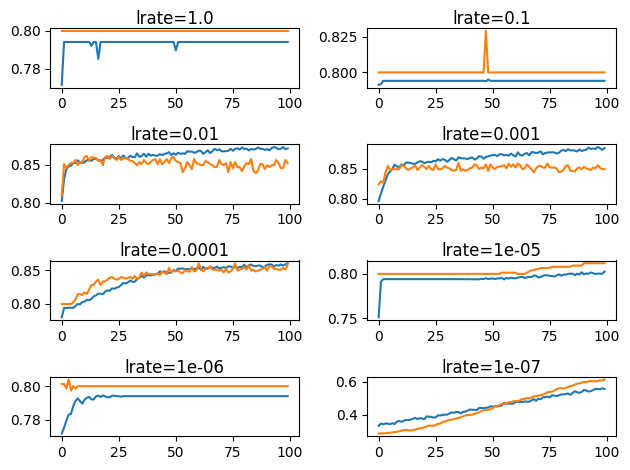

In [ ]:
# fit the model with different learning rate and draw the train Vs validation train data accuracy
# Train -> Blue
# Validation -> Orange
learning_rates = [1E-0, 1E-1,1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  fit_model(X_train,y_train,X_test,y_test, learning_rates[i])

plt.show()


* Learning rate 0.001 and 0.0001 showing the less overfit with training data.
* Accuracy is about to 85% for learning rate 1E-4.
* Let's consider 0.0001 learning rate , fit the model and check the confusion matrix.

In [ ]:
# NN model with learning rate 0.0001
model_01 = ann_with_dropout()

# compile the model
model_01.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), loss=['binary_crossentropy'], metrics=['accuracy'])
model_01.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


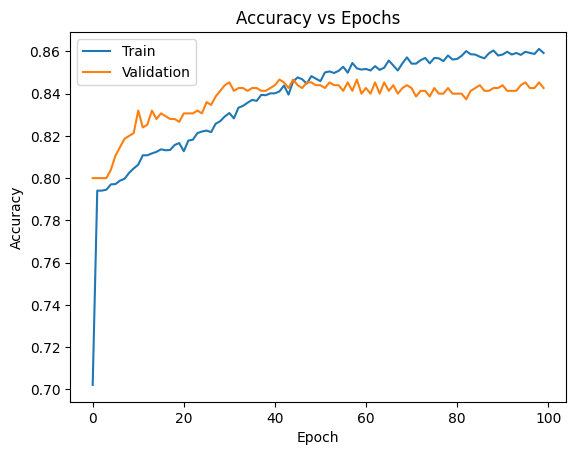

In [ ]:
history_learning_rate = model_01.fit(X_train, y_train, validation_split=.1, epochs=100, verbose=0)

# plot the accuracy vs epoch
plot_accuracy(history_learning_rate)


235/235 [==============================] - 0s 1ms/step


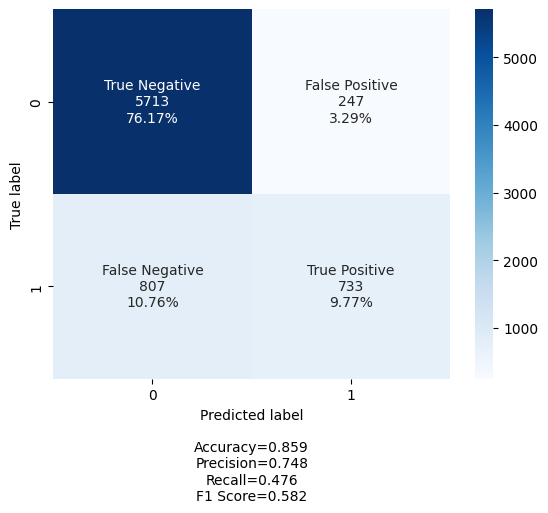

In [ ]:
# evaluate the model on training
df_ann_with_dropout_with_learning_rate_train = evalute_model(model_01,X_train,y_train)

79/79 [==============================] - 0s 1ms/step


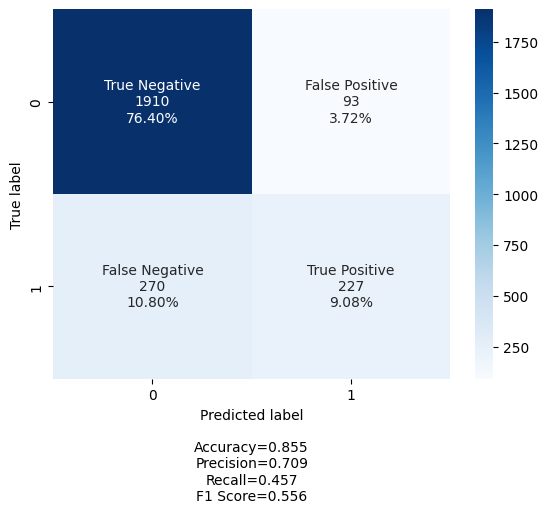

In [ ]:
# evaluate the model on training
df_ann_with_dropout_with_learning_rate_test = evalute_model(model_01,X_test,y_test)

* Model is showing the generalized result on test data after different hyper tuning but recall is low.  
* Let's increase the complexity of the network by adding hidden layers.

In [ ]:
# get AUC
model_01_score, model_01_fpr,model_01_tpr, model_01_thresholds = get_auc_scores(model_01,X_train,y_train)

235/235 [==============================] - 0s 1ms/step


In [ ]:
model = ann_with_hidden_and_dropout()

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), loss=['binary_crossentropy'], metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                768       
                                                                 
 dense_85 (Dense)            (None, 128)               8320      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_86 (Dense)            (None, 256)               33024     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_87 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42369 (165.50 KB)
Trainable params: 423

In [ ]:
# fit the model
history_learning_rate_with_hidden_layers = model.fit(X_train, y_train, validation_split=.1, epochs=100, verbose=0)

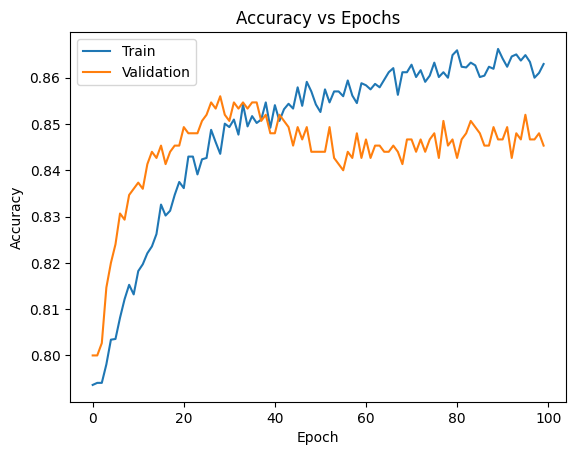

In [ ]:
plot_accuracy(history_learning_rate_with_hidden_layers)

235/235 [==============================] - 0s 2ms/step


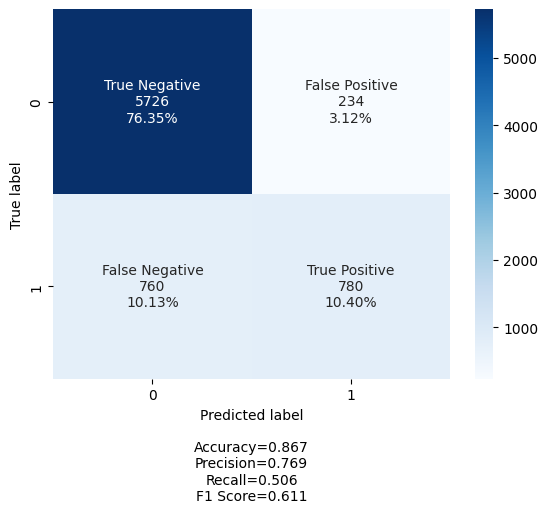

In [ ]:
# evaluate the model on training
df_learning_rate_with_hidden_layers_train = evalute_model(model,X_train,y_train)

79/79 [==============================] - 0s 2ms/step


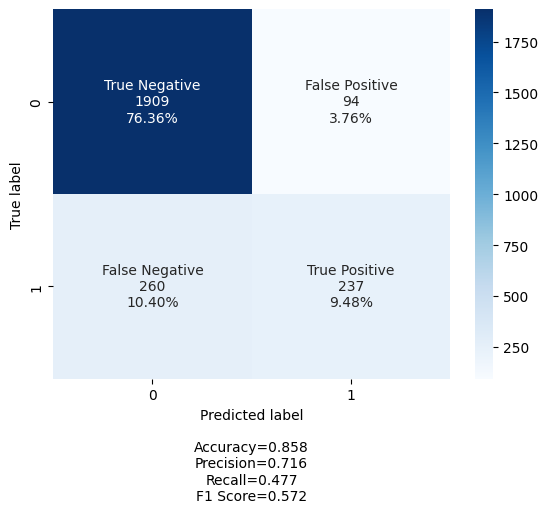

In [ ]:
learning_rate_with_hidden_layers_test = evalute_model(model,X_test,y_test)

* After added complexity in NN, model does not showing significant improvement.

## Build the Neural Network model with SGD as an optimizer

In [ ]:
# create a network
model_02 = ann_with_hidden_and_dropout()

# compile the model
model_02.compile(optimizer=tf.keras.optimizers.SGD(), loss=['binary_crossentropy'], metrics=['accuracy'])
model_02.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 42369 (165.50 KB)
Trainable params: 42369 

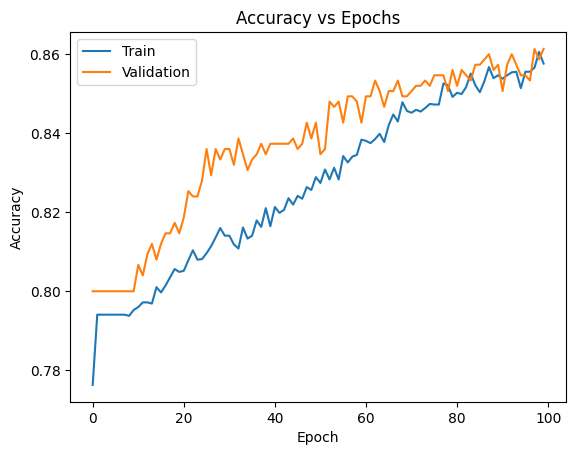

In [ ]:
# fit the model
history_learning_rate_with_sgd = model_02.fit(X_train, y_train, validation_split=.1, epochs=100, verbose=0)

# accuracy Vs Epoch
plot_accuracy(history_learning_rate_with_sgd)

235/235 [==============================] - 0s 1ms/step


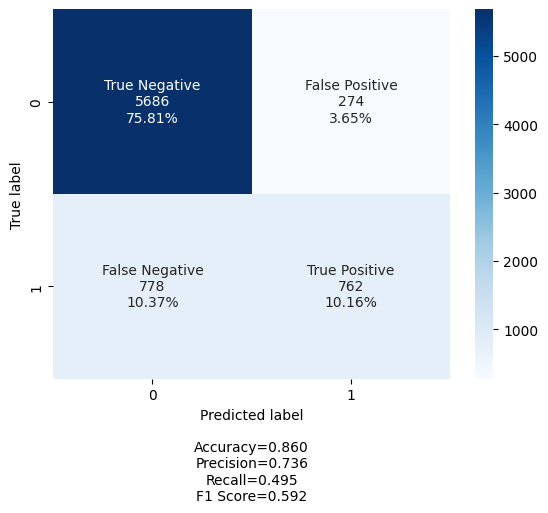

In [ ]:
# evaluate the model on training
df_learning_rate_with_hidden_layers_sgd_train = evalute_model(model_02,X_train,y_train)

79/79 [==============================] - 0s 2ms/step


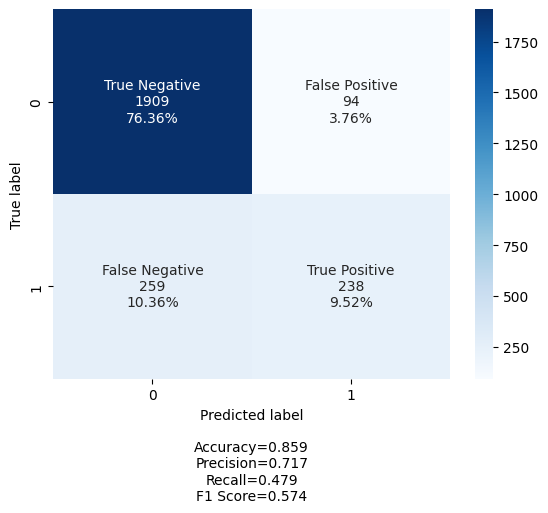

In [ ]:
df_learning_rate_with_hidden_layers_sgd_test = evalute_model(model_02,X_test,y_test)

In [ ]:
# get AUC
model_02_score, model_02_fpr, model_02_tpr, model_02_thresholds = get_auc_scores(model_02, X_train,y_train)

235/235 [==============================] - 0s 2ms/step


## Build a model with balanced data by applying SMOTE and Adam optimizer

In [24]:
sm = SMOTE(sampling_strategy='minority', k_neighbors=10,random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train,y_train)

In [25]:
print('Before Oversampling')
y_train.value_counts()

Before Oversampling


0    5960
1    1540
Name: Exited, dtype: int64

In [26]:
print('After Oversampling')
y_train_over.value_counts()

After Oversampling


1    5960
0    5960
Name: Exited, dtype: int64

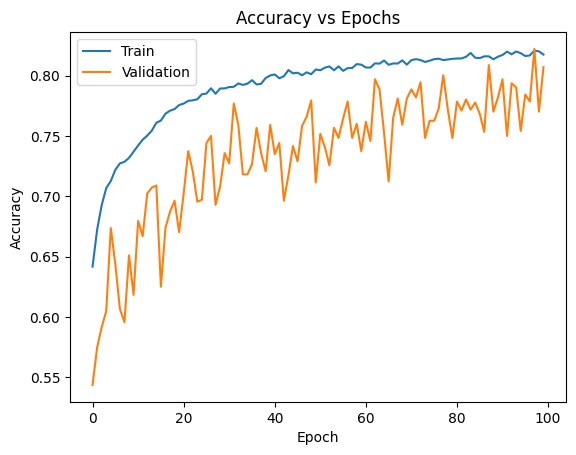

In [27]:
# create a ANN model with learning rate 1E-4

clear_session()

model_over = ann_with_dropout()
model_over.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), loss=['binary_crossentropy'], metrics=['accuracy'])

# fit the model
history_over = model_over.fit(X_train_over, y_train_over, validation_split=.1, batch_size=10, epochs=100, verbose=0)

# plot the accuracy vs epochs
plot_accuracy(history_over)

373/373 [==============================] - 1s 1ms/step


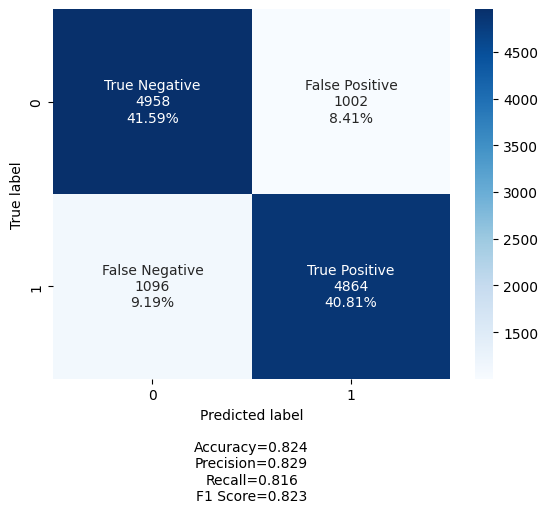

In [28]:
# model evalution on training
df_over_training = evalute_model(model_over, X_train_over, y_train_over)

79/79 [==============================] - 0s 2ms/step


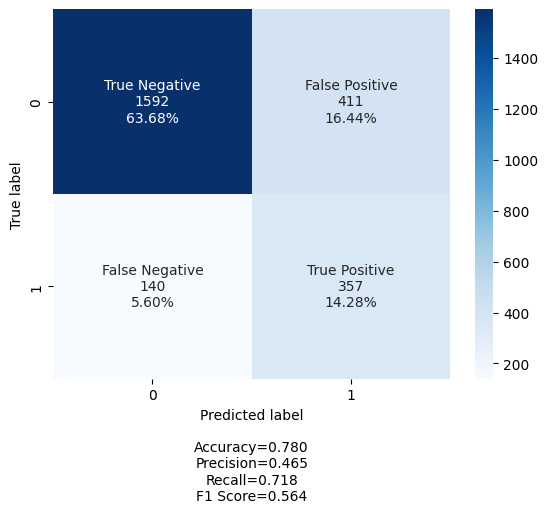

In [29]:
# model evalution on test
df_over_test = evalute_model(model_over, X_test, y_test)

* Balanced data showing the significant improved in recall.
* Model predicting only 140 customer's will not churn but actual they will move from bank.
* Model is predicting 357 custome's will churn and actual they will move from bank.

In [ ]:
model_over_score,model_over_fpr,model_over_tpr,model_over_thresholds = get_auc_scores(model_over,X_train,y_train)

235/235 [==============================] - 0s 1ms/step


## Model Summary

In [ ]:
df_model_train_comparision = pd.concat([
    df_ann_train.T,
    df_ann_with_dropout_train.T,
    df_ann_with_hidden_and_dropout_training.T,
    df_ann_batch_size_and_number_of_epoch_train.T,
    df_ann_optimizer_algorithm_train.T,
    df_ann_optimizer_algorithm_with_learning_rate_train.T,
    df_ann_with_dropout_with_learning_rate_train.T,
    df_learning_rate_with_hidden_layers_train.T,
    df_learning_rate_with_hidden_layers_sgd_train.T,
    df_over_training.T

],
axis = 1
)

df_model_train_comparision.columns = [
    'Basic NN',
    'Dropout',
    'Hidden and Dropout',
    'Batch and Epoch',
    'Optimizer',
    'Optimizer and Learning rate',
    'Dropout and Learning rate',
    'Learning rate and Hidden Layer',
    'SGD',
    'Balanced (SMOTE)'

]

In [ ]:
df_model_test_comparision = pd.concat([
    df_ann_test.T,
    df_ann_with_dropout_test.T,
    df_ann_with_hidden_and_dropout_test.T,
    df_ann_batch_size_and_number_of_epoch_test.T,
    df_ann_optimizer_algorithm_test.T,
    df_ann_optimizer_algorithm_with_learning_rate_test.T,
    df_ann_with_dropout_with_learning_rate_test.T,
    learning_rate_with_hidden_layers_test.T,
    df_learning_rate_with_hidden_layers_sgd_test.T,
    df_over_test.T

],
axis = 1
)

df_model_test_comparision.columns = [
    'Basic NN',
    'Dropout',
    'Hidden and Dropout',
    'Batch and Epoch',
    'Optimizer',
    'Optimizer and Learning rate',
    'Dropout and Learning rate',
    'Learning rate and Hidden Layer',
    'SGD',
    'Balanced (SMOTE)'

]

In [ ]:
print('Training Performance')
df_model_train_comparision

Training Performance


,Basic NN,Dropout,Hidden and Dropout,Batch and Epoch,Optimizer,Optimizer and Learning rate,Dropout and Learning rate,Learning rate and Hidden Layer,SGD,Balanced (SMOTE)
Accuracy,0.882267,0.888933,0.918267,0.862800,0.800533,0.801333,0.858000,0.867467,0.860000,0.824497
Precision,0.770370,0.813109,0.884010,0.838411,0.729167,0.745098,0.749737,0.769231,0.737864,0.830598
Recall,0.607792,0.596104,0.692857,0.411039,0.045455,0.049351,0.462987,0.506494,0.493506,0.815268
F1-Score,0.679492,0.687898,0.776847,0.551634,0.085575,0.092570,0.572461,0.610807,0.591440,0.822862


In [ ]:
print('Test Performance')
df_model_test_comparision

Test Performance


,Basic NN,Dropout,Hidden and Dropout,Batch and Epoch,Optimizer,Optimizer and Learning rate,Dropout and Learning rate,Learning rate and Hidden Layer,SGD,Balanced (SMOTE)
Accuracy,0.852400,0.855600,0.842400,0.860000,0.810000,0.813600,0.860800,0.858400,0.862000,0.784400
Precision,0.660000,0.677083,0.629723,0.807531,0.805556,0.897436,0.742671,0.716012,0.723529,0.472798
Recall,0.531187,0.523139,0.503018,0.388330,0.058350,0.070423,0.458753,0.476861,0.494970,0.734406
F1-Score,0.588629,0.590238,0.559284,0.524457,0.108818,0.130597,0.567164,0.572464,0.587814,0.575256


* Oversampling by SMOTE is giving the best recall in training and test dataset . But overfitting the training data set.
* Stochastic gradient descent (SGD) is giving the generalized performance and recall is only ~ .49 compare to oversampling. Accuracy is also ~ .86
* Dropout and Learning rate network also showing recall ~.45-.46 .
* Dropout network also showing recall ~.59 - .52.
* Let consider SMOTE,SGD and Dropout/Learning rate model for further tuning.
* None of the models showing good generalized model with good recall.
* Accuracy in all models range from .80 - .88 , means network reached to local minima.

## ROC Curve

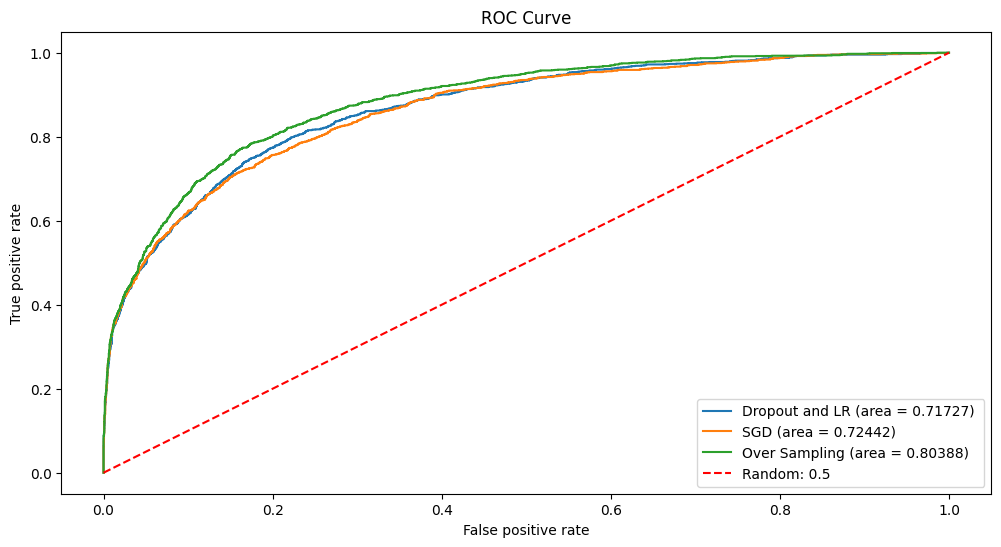

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(model_01_fpr,model_01_tpr, label='Dropout and LR (area = %.5f) ' % model_01_score)
plt.plot(model_02_fpr,model_02_tpr, label='SGD (area = %0.5f)' % model_02_score)
plt.plot(model_over_fpr,model_over_tpr, label='Over Sampling (area = %.5f)' % model_over_score)
plt.plot([0,1], [0,1], 'r--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

* Artificial Neural Network (ANN) with balanced data showing the good AUC score for training data comapre to other two .
* Our focus is not to predict the customers that will not churn but actually they will churn so they can be put in some sort of scheme to prevent churn  hence the recall measures is of more importance than the overall accuracy score of the model.
* Consider only Oversampling model (SMOTE) for furthur tuning to see if can improve recall.

235/235 [==============================] - 1s 5ms/step
0.454203
235/235 [==============================] - 1s 3ms/step


,Accuracy,Precision,Recall,F1-Score
0,0.970267,1.0,0.904904,0.950078


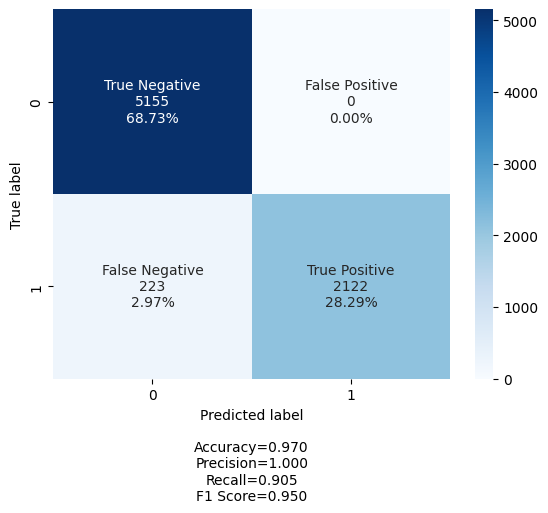

In [26]:
clear_session()

# Find the optimal threshold
fpr,tpr,thresholds = roc_curve(y_train,model_over.predict(X_train))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

y_over_pred = model_over.predict(X_train)

y_over_pred_threshold = y_over_pred > optimal_threshold_auc_roc

# evaluate the performace on training
evalute_model(model_over, X_train, np.round(y_over_pred_threshold))

79/79 [==============================] - 0s 2ms/step


,Accuracy,Precision,Recall,F1-Score
0,0.9668,1.0,0.895729,0.944997


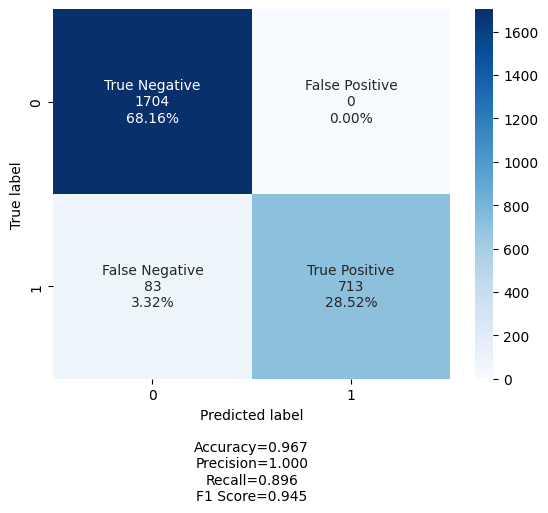

In [27]:
y_over_pred_test = model_over.predict(X_test)

y_over_pred_threshold_test = y_over_pred_test > optimal_threshold_auc_roc

# evaluate the performace on training
evalute_model(model_over, X_test, np.round(y_over_pred_threshold_test))


* Optimal threshold value is 0.454203.
* After applying optimal threshold , significant jump in recall and accuracy with balanced data.


## Shapley Additive Explanation (SHAP) analysis

In [30]:
shap.initjs()

  0%|          | 0/50 [00:00<?, ?it/s]

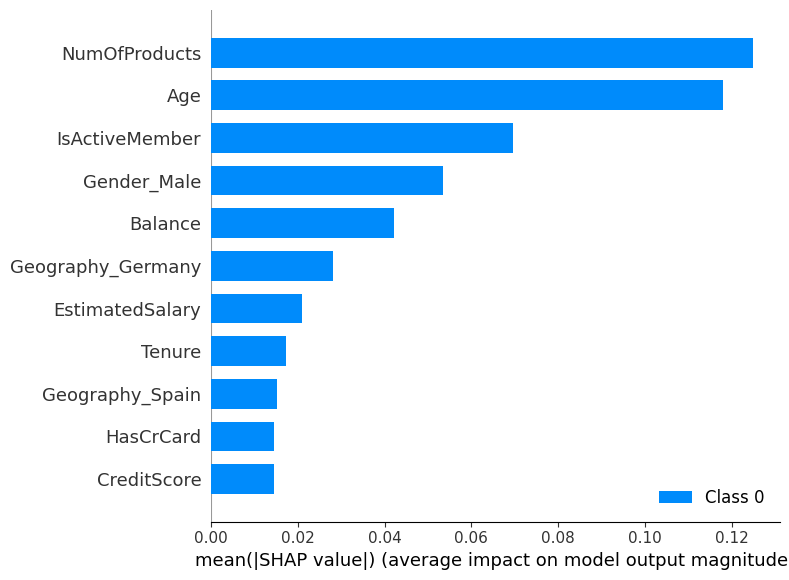

In [87]:
# taking only few data points to avoid colab runtime to crash.

# no of features
features = list(subset_df.columns)

# fit the kernel explainer
explainer = shap.KernelExplainer(model_over,X_train[0:100,])

# feature importance on only first 50 data points
shap_values = explainer.shap_values(X_test[0:50,])

# plot the feature importance
shap.summary_plot(shap_values, X_test[0:50], features)

## Conclusions and Recommendations

* We are considered balancing data using SMOTE and optimal threshold (0.454203) which provide good result in training and test dataset.
* None of the models showing generalized performance but SMOTE work best among.
* Based on 100 sample in training and 50 sample in test for SHAP analysis and found below observations:
  *   NumOfProducts showing the important feature.
  *   Age is the second most important feature.
  *   IsActiveMember is the next important feature.
* Non Active member likely to leave the bank, bank should target these customers to give offers.
* Older members likely to churn , bank should target these customers with offers, incentives , tenure bonus etc, to avoid these segments customer's churn.
* Member having the more number of products from other banks , likely to churn. Bank need to understabd the ongoining campaign from other banks and take approperiate steps to avoid to churn in future .
* Marketing and promotional offers to meet the specific needs and preferences of customers who are at risk of leaving. By providing targeted incentives and solutions, the bank can encourage these customers to stay.
* Enhance the overall customer experience by ensuring prompt and efficient support, addressing customer complaints effectively, and offering proactive assistance. By providing exceptional service, the bank can strengthen customer loyalty and reduce the likelihood of churn.
* Introduce loyalty programs, rewards, and exclusive benefits for long-standing customers. By offering incentives for continued engagement, the bank can encourage customers to remain loyal and reduce the temptation to switch to competitors.

